In [1]:
import numpy as np
import matplotlib,pylab as plt
import tensorflow as tf
import os
from scipy.io import loadmat 

/home/mlvm2/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
PATH = "/home/mlvm2/dissertation/My_programme/dissertation_data"
Data_list = list(os.path.join(PATH, name) for name in os.listdir(PATH))

In [5]:
dataset = loadmat(Data_list[3])    
signals = dataset['emg'][0:125] 

# first ensure how many row samples inthe data should be cut. 
cut_num = len(signals[0])%100
#print(cut_num)
    
# cut signal.
cut_signals = signals.copy()
for i in range(0, cut_num):
    cut_signals = np.delete(cut_signals, len(cut_signals[0]) - 1, axis = 1)
signal_process1 = np.zeros(shape = [cut_signals.shape[0], int(cut_signals.shape[1] / 100)])
    #print(cut_signals.shape)
    
    # extract abs features.
for channels in range(0, cut_signals.shape[0]):
    process1 = np.zeros(int(cut_signals.shape[1] / 100))
    for i in range(0, int(cut_signals.shape[1])/ 100):
        for j in range(0, 100):
            process1[i] = process1[i] + abs(cut_signals[channels, 100 * i + j])
        process1[i] = process1[i] / 100
    for i in range(0, int(cut_signals.shape[1] / 100)):
        signal_process1[channels][i] = process1[i]

In [6]:
signal_process1.shape[1]

1187

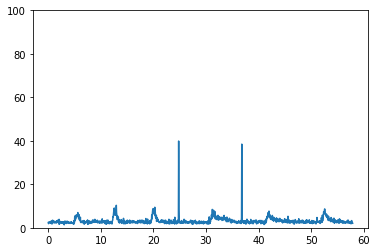

In [7]:
time = np.zeros(signal_process1.shape[1])
for i in range(0, signal_process1.shape[1]):
    time[i] = float(i)/2048 * 100

plt.plot(time, signal_process1[1])
plt.ylim(0, 100)
plt.show()

In [8]:
signal_process2 = signal_process1[:, 0:60]
signal_process2[0]

array([2.68425996, 1.96026424, 2.74205495, 2.88715814, 2.57342178,
       2.92976131, 2.92129711, 3.15319084, 2.55004228, 2.7096804 ,
       3.51482713, 2.18337788, 3.2728604 , 2.76996192, 2.00819144,
       1.935066  , 3.64284047, 2.46435041, 3.8293394 , 3.03597779,
       2.93898641, 3.4104759 , 2.71484077, 3.41340739, 3.010416  ,
       2.67597512, 2.40481961, 2.59811188, 3.35356394, 2.96191969,
       2.38967458, 2.5668604 , 3.70588952, 2.72275007, 3.0879194 ,
       3.16215065, 3.42326613, 3.44956712, 2.91860764, 3.99087954,
       2.9977129 , 1.92616887, 4.10757601, 1.90589494, 2.52365184,
       2.75137242, 3.40483173, 3.10191758, 3.03005276, 2.84243679,
       2.48258811, 2.83891734, 2.21060616, 2.96605765, 2.53108223,
       2.31256565, 2.93472529, 2.68156649, 3.20333503, 2.13914003])

In [9]:
for i in range(1, signal_process1.shape[1] - 60):
    processing = signal_process1[:, i:60 + i]
    signal_process2 = np.append(signal_process2, processing)

In [10]:
signal_process2 = signal_process2.reshape(signal_process1.shape[1] - 60, 125, 60)

In [11]:
signal_input_final = (signal_process2.copy()).reshape(signal_process1.shape[1] - 60, 60, 125)
for i in range(0, signal_process1.shape[1] - 60):
    for j in range(0, 60):
        for k in range(0, 125):
            signal_input_final[i,j,k] = signal_process2[i,k,j]

In [12]:
signal_input = signal_input_final

In [26]:
dataset = loadmat(Data_list[7]) 
labels = dataset['glove'][0]

cut_num = len(labels)%100
    
for i in range(0, cut_num):
    cut_labels = np.delete(labels, len(labels) - 1)

labels_process1 = np.zeros(int(len(cut_labels)/100))

for i in range(int(len(cut_labels)/100)):
    labels_process1[i] = labels[i*100]

In [27]:
label_input = labels_process1[60:]
label_final_input = label_input.copy()
for i in range(0, label_final_input.shape[0]):
    label_final_input[i] = labels_process1[60 + i] - labels_process1[i]

In [28]:
#np.save("t_s_signal_10_60inputs", signal_input)
np.save("t_s_error_label_8_60inputs", label_final_input)

In [10]:
time = np.zeros(signal_process1.shape[1])
for i in range(0, signal_process1.shape[1]):
    time[i] = float(i)/2048*100

plt.plot(time, labels_process1)
plt.show()

NameError: name 'signal_process1' is not defined

In [17]:
signal_train = signal_input[0: int(0.75*signal_input.shape[0])]
signal_test = signal_input[int(0.75*signal_input.shape[0]):]
label_train = label_final_input[0: int(0.75*label_input.shape[0])]
label_test = label_final_input[int(0.75*label_input.shape[0]):]

In [18]:
signal_train.shape

(845, 60, 125)

In [19]:
import keras

from keras.layers import Input, Dense, Activation, Embedding, LSTM, Flatten, Conv1D
from keras.utils import np_utils

from keras.models import Model, Sequential
from keras.utils import np_utils

from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [20]:
# --------------------------------------------------------
# keras model.
# --------------------------------------------------------

tsrnnmodel = Sequential()
#tsrnnmodel.add(Dense(240, activation = 'relu', input_shape = [6, 500]))
#tsrnnmodel.add(Dense(60, activation = 'relu'))
#tsrnnmodel.add(Conv1D(filters = 32, kernel_size = 2,padding='Same', activation='relu', input_shape = [10, 500]))
tsrnnmodel.add(Dense(25, activation = 'relu', input_shape = [60, 125]))
tsrnnmodel.add(Dense(5, activation = 'relu'))
tsrnnmodel.add(LSTM(60, kernel_regularizer = keras.regularizers.l2(0.01)))
tsrnnmodel.add(Dense(1))
#tsrnnmodel.add(Dense(output_dim = 5, activation = 'softmax'))
tsrnnmodel.compile(loss = 'mse', optimizer = 'adam')
#tsrnnmodel.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
tsrnnmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60, 25)            3150      
_________________________________________________________________
dense_2 (Dense)              (None, 60, 5)             130       
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                15840     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 19,181
Trainable params: 19,181
Non-trainable params: 0
_________________________________________________________________


In [22]:
tsrnnmodel.fit(signal_train, label_train, epochs = 80, batch_size = 20, verbose = 2)

Epoch 1/80
 - 3s - loss: 0.0909
Epoch 2/80
 - 2s - loss: 0.0527
Epoch 3/80
 - 2s - loss: 0.0367
Epoch 4/80
 - 2s - loss: 0.0295
Epoch 5/80
 - 2s - loss: 0.0266
Epoch 6/80
 - 2s - loss: 0.0211
Epoch 7/80
 - 3s - loss: 0.0120
Epoch 8/80
 - 2s - loss: 0.0108
Epoch 9/80
 - 2s - loss: 0.0098
Epoch 10/80
 - 2s - loss: 0.0098
Epoch 11/80
 - 2s - loss: 0.0089
Epoch 12/80
 - 2s - loss: 0.0087
Epoch 13/80
 - 3s - loss: 0.0083
Epoch 14/80
 - 4s - loss: 0.0079
Epoch 15/80
 - 3s - loss: 0.0081
Epoch 16/80
 - 2s - loss: 0.0079
Epoch 17/80
 - 2s - loss: 0.0074
Epoch 18/80
 - 2s - loss: 0.0082
Epoch 19/80
 - 2s - loss: 0.0056
Epoch 20/80
 - 2s - loss: 0.0049
Epoch 21/80
 - 2s - loss: 0.0039
Epoch 22/80
 - 2s - loss: 0.0029
Epoch 23/80
 - 2s - loss: 0.0025
Epoch 24/80
 - 2s - loss: 0.0021
Epoch 25/80
 - 2s - loss: 0.0025
Epoch 26/80
 - 2s - loss: 0.0028
Epoch 27/80
 - 3s - loss: 0.0020
Epoch 28/80
 - 2s - loss: 0.0016
Epoch 29/80
 - 2s - loss: 0.0016
Epoch 30/80
 - 2s - loss: 0.0016
Epoch 31/80
 - 2s -

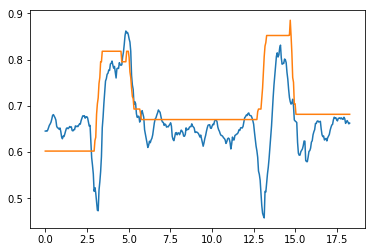

In [221]:
# ------------------------------------------------------
# Produce result(result of 20 inputs, training with data 7, test with data 7).
# ------------------------------------------------------
test_prediction = tsrnnmodel.predict(signal_test)
test_prediction = test_prediction.reshape(len(label_test))
time_test = np.zeros(len(label_test))

for i in range(0, len(label_test)):
    time_test[i] = float(i)/2048*100

time_test = time_test[0:len(label_test)]
test_prediction = test_prediction[0:len(label_test)]

plt.plot(time_test, test_prediction, time_test, label_test[0:len(label_test)])
plt.show()

In [174]:
dataset['movement'][0]

u'thumbExt'

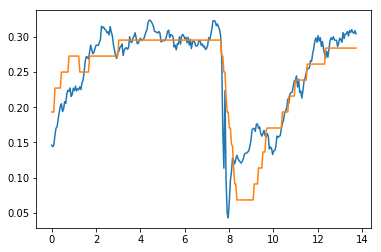

In [165]:
# ------------------------------------------------------
# Produce result(result of 60 inputs, traning with data 3, test with data 3).
# ------------------------------------------------------
test_prediction = tsrnnmodel.predict(signal_test)
test_prediction = test_prediction.reshape(len(label_test))
time_test = np.zeros(len(label_test))

for i in range(0, len(label_test)):
    time_test[i] = float(i)/2048*100

time_test = time_test[0:len(label_test)]
test_prediction = test_prediction[0:len(label_test)]

plt.plot(time_test, test_prediction, time_test, label_test[0:len(label_test)])
plt.show()

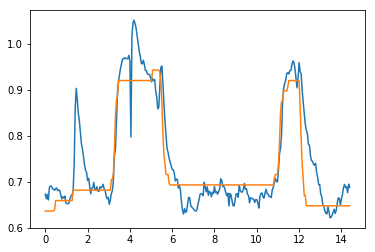

In [184]:
# ------------------------------------------------------
# Produce result(result of 60 inputs, traning with data 7, test with data 7).
# Compare to 20 inputs, these results are better.
# ------------------------------------------------------
test_prediction = tsrnnmodel.predict(signal_test)
test_prediction = test_prediction.reshape(len(label_test))
time_test = np.zeros(len(label_test))

for i in range(0, len(label_test)):
    time_test[i] = float(i)/2048*100

time_test = time_test[0:len(label_test)]
test_prediction = test_prediction[0:len(label_test)]

plt.plot(time_test, test_prediction, time_test, label_test[0:len(label_test)])
plt.show()

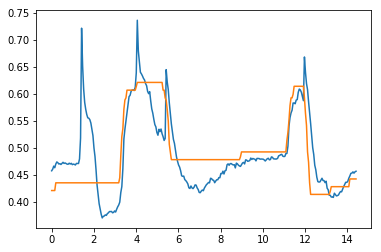

In [202]:
# ------------------------------------------------------
# Produce result, finger2(result of 60 inputs, traning with data 7, test with data 7).
# Compare to 20 inputs, these results are better.
# ------------------------------------------------------
test_prediction = tsrnnmodel.predict(signal_test)
test_prediction = test_prediction.reshape(len(label_test))
time_test = np.zeros(len(label_test))

for i in range(0, len(label_test)):
    time_test[i] = float(i)/2048*100

time_test = time_test[0:len(label_test)]
test_prediction = test_prediction[0:len(label_test)]

plt.plot(time_test, test_prediction, time_test, label_test[0:len(label_test)])
plt.show()

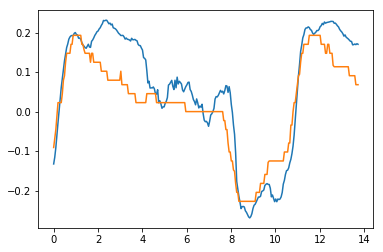

In [23]:
# ------------------------------------------------------
# Produce result, finger2(result of 60 inputs, traning with data 3, test with data 3, change label error).
# Compare to 20 inputs, these results are better.
# ------------------------------------------------------
test_prediction = tsrnnmodel.predict(signal_test)
test_prediction = test_prediction.reshape(len(label_test))
time_test = np.zeros(len(label_test))

for i in range(0, len(label_test)):
    time_test[i] = float(i)/2048*100

time_test = time_test[0:len(label_test)]
test_prediction = test_prediction[0:len(label_test)]

plt.plot(time_test, test_prediction, time_test, label_test[0:len(label_test)])
plt.show()